In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF

# Carregar dados do arquivo CSV
df = pd.read_csv('lista_de_espera_sisu_2022_1.csv', sep='|', encoding='latin-1')

print(df.columns)
# Adicionar coluna NUM_CANDIDATOS com valor fixo
df['NUM_CANDIDATOS'] = 3476226
# Agrupar dados por universidade e estado
df_grouped = df.groupby(['SIGLA_IES', 'UF_IES']).agg({'QT_VAGAS_CONCORRENCIA': 'sum', 'NUM_CANDIDATOS': 'sum'})

# Calcular a razão de candidatos por vaga
df_grouped['Razao_Candidatos_por_Vaga'] = df_grouped['NUM_CANDIDATOS'] / df_grouped['QT_VAGAS_CONCORRENCIA']

# Renomear colunas
df_grouped.columns = ['Vagas', 'Candidatos', 'Razao_Candidatos_por_Vaga']

/var/folders/cj/fxsvrm2n5hg9s3svd97hl9bc0000gn/T/ipykernel_7744/3047992592.py:6: DtypeWarning: Columns (17,22,23,24,25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('lista_de_espera_sisu_2022_1.csv', sep='|', encoding='latin-1')


Index(['ANO', 'EDICAO', 'ETAPA', 'DS_ETAPA', 'CODIGO_IES', 'NOME_IES',
       'SIGLA_IES', 'UF_IES', 'CODIGO_CAMPUS', 'NOME_CAMPUS', 'UF_CAMPUS',
       'MUNICIPIO_CAMPUS', 'CODIGO_CURSO', 'NOME_CURSO', 'GRAU', 'TURNO',
       'DS_PERIODICIDADE', 'TP_COTA', 'TIPO_MOD_CONCORRENCIA',
       'MOD_CONCORRENCIA', 'QT_VAGAS_CONCORRENCIA', 'PERCENTUAL_BONUS',
       'PESO_L', 'PESO_CH', 'PESO_CN', 'PESO_M', 'PESO_R', 'NOTA_MINIMA_L',
       'NOTA_MINIMA_CH', 'NOTA_MINIMA_CN', 'NOTA_MINIMA_M', 'NOTA_MINIMA_R',
       'MEDIA_MINIMA', 'CPF', 'INSCRICAO_ENEM', 'INSCRITO', 'SEXO',
       'DATA_NASCIMENTO', 'UF_CANDIDATO', 'MUNICIPIO_CANDIDATO', 'OPCAO',
       'NOTA_L', 'NOTA_CH', 'NOTA_CN', 'NOTA_M', 'NOTA_R', 'NOTA_L_COM_PESO',
       'NOTA_CH_COM_PESO', 'NOTA_CN_COM_PESO', 'NOTA_M_COM_PESO',
       'NOTA_R_COM_PESO', 'NOTA_CANDIDATO', 'NOTA_CORTE', 'CLASSIFICACAO',
       'APROVADO', 'MATRICULA'],
      dtype='object')


In [39]:
# Filtrar instituições do estado de São Paulo e Minas Gerais
df_sp_mg = df[(df['UF_IES'] == 'SP') | (df['UF_IES'] == 'MG')]

# Print the columns
print(df_sp_mg.columns)

Index(['ANO', 'EDICAO', 'ETAPA', 'DS_ETAPA', 'CODIGO_IES', 'NOME_IES',
       'SIGLA_IES', 'UF_IES', 'CODIGO_CAMPUS', 'NOME_CAMPUS', 'UF_CAMPUS',
       'MUNICIPIO_CAMPUS', 'CODIGO_CURSO', 'NOME_CURSO', 'GRAU', 'TURNO',
       'DS_PERIODICIDADE', 'TP_COTA', 'TIPO_MOD_CONCORRENCIA',
       'MOD_CONCORRENCIA', 'QT_VAGAS_CONCORRENCIA', 'PERCENTUAL_BONUS',
       'PESO_L', 'PESO_CH', 'PESO_CN', 'PESO_M', 'PESO_R', 'NOTA_MINIMA_L',
       'NOTA_MINIMA_CH', 'NOTA_MINIMA_CN', 'NOTA_MINIMA_M', 'NOTA_MINIMA_R',
       'MEDIA_MINIMA', 'CPF', 'INSCRICAO_ENEM', 'INSCRITO', 'SEXO',
       'DATA_NASCIMENTO', 'UF_CANDIDATO', 'MUNICIPIO_CANDIDATO', 'OPCAO',
       'NOTA_L', 'NOTA_CH', 'NOTA_CN', 'NOTA_M', 'NOTA_R', 'NOTA_L_COM_PESO',
       'NOTA_CH_COM_PESO', 'NOTA_CN_COM_PESO', 'NOTA_M_COM_PESO',
       'NOTA_R_COM_PESO', 'NOTA_CANDIDATO', 'NOTA_CORTE', 'CLASSIFICACAO',
       'APROVADO', 'MATRICULA', 'NUM_CANDIDATOS'],
      dtype='object')


In [40]:
print(df_sp_mg)

         ANO  EDICAO  ETAPA         DS_ETAPA  CODIGO_IES  \
1767    2022       1      7  LISTA DE ESPERA         594   
1768    2022       1      7  LISTA DE ESPERA         594   
1769    2022       1      7  LISTA DE ESPERA         594   
1770    2022       1      7  LISTA DE ESPERA         594   
1771    2022       1      7  LISTA DE ESPERA         594   
...      ...     ...    ...              ...         ...   
592956  2022       1      7  LISTA DE ESPERA         596   
592957  2022       1      7  LISTA DE ESPERA         596   
592958  2022       1      7  LISTA DE ESPERA         596   
592959  2022       1      7  LISTA DE ESPERA         596   
592960  2022       1      7  LISTA DE ESPERA         596   

                                                 NOME_IES SIGLA_IES UF_IES  \
1767    CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA DE MINA...  CEFET/MG     MG   
1768    CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA DE MINA...  CEFET/MG     MG   
1769    CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGIC

In [41]:
# Ordenar dados por razão de candidatos por vaga em ordem decrescente
df_grouped = df_grouped.sort_values(by='Razao_Candidatos_por_Vaga', ascending=False)

       ANO  EDICAO  ETAPA         DS_ETAPA  CODIGO_IES  \
1767  2022       1      7  LISTA DE ESPERA         594   
1768  2022       1      7  LISTA DE ESPERA         594   
1769  2022       1      7  LISTA DE ESPERA         594   
1770  2022       1      7  LISTA DE ESPERA         594   
1771  2022       1      7  LISTA DE ESPERA         594   
...    ...     ...    ...              ...         ...   
2878  2022       1      7  LISTA DE ESPERA         594   
2879  2022       1      7  LISTA DE ESPERA         594   
2880  2022       1      7  LISTA DE ESPERA         594   
2881  2022       1      7  LISTA DE ESPERA         594   
2882  2022       1      7  LISTA DE ESPERA         594   

                                               NOME_IES SIGLA_IES UF_IES  \
1767  CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA DE MINA...  CEFET/MG     MG   
1768  CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA DE MINA...  CEFET/MG     MG   
1769  CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA DE MINA...  CEFET/MG     MG   

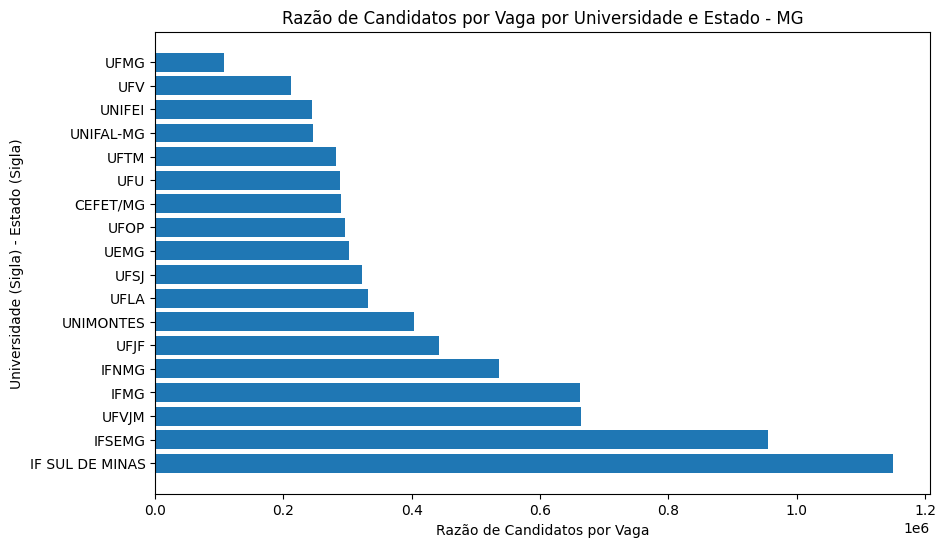

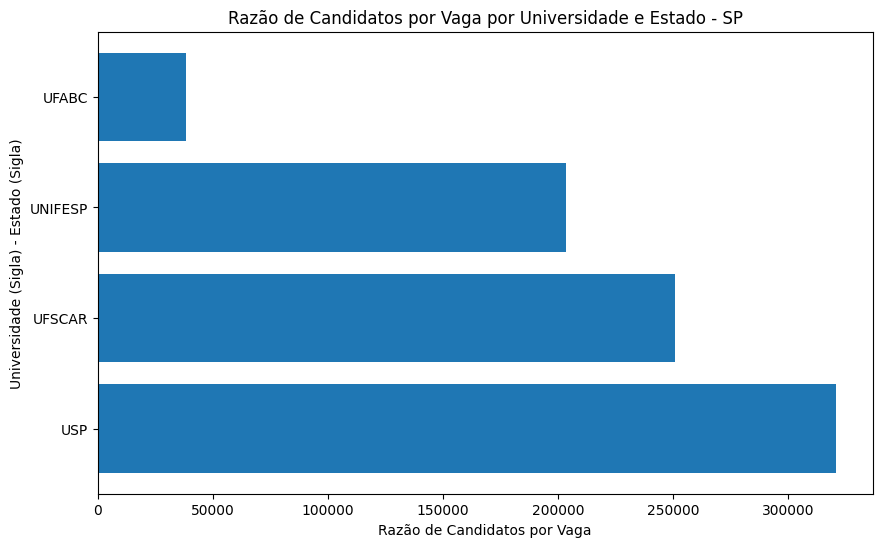

In [42]:
# Filtrar instituições com sigla que terminam com /SP ou /MG
df_sp_mg = df[(df['SIGLA_IES'].str.endswith('/SP')) | (df['SIGLA_IES'].str.endswith('/MG'))]

# Print the resulting dataframe
print(df_sp_mg)


# Selecionar as 20 instituições com a maior razão de candidatos por vaga em MG
df_sorted_mg = df_mg.sort_values('Razao_Candidatos_por_Vaga', ascending=False)
df_top_20_mg = df_sorted_mg.head(20)

# Gerar gráfico de barras para MG
plt.figure(figsize=(10, 6))
plt.barh(df_top_20_mg['SIGLA_IES'], df_top_20_mg['Razao_Candidatos_por_Vaga'])
plt.xlabel('Razão de Candidatos por Vaga')
plt.ylabel('Universidade (Sigla) - Estado (Sigla)')
plt.title('Razão de Candidatos por Vaga por Universidade e Estado - MG')

# Salvar gráfico como imagem para MG
plt.savefig('graph_mg.png', bbox_inches='tight')

# Selecionar as 20 instituições com a maior razão de candidatos por vaga em SP
df_sorted_sp = df_sp.sort_values('Razao_Candidatos_por_Vaga', ascending=False)
df_top_20_sp = df_sorted_sp.head(20)

# Gerar gráfico de barras para SP
plt.figure(figsize=(10, 6))
plt.barh(df_top_20_sp['SIGLA_IES'], df_top_20_sp['Razao_Candidatos_por_Vaga'])
plt.xlabel('Razão de Candidatos por Vaga')
plt.ylabel('Universidade (Sigla) - Estado (Sigla)')
plt.title('Razão de Candidatos por Vaga por Universidade e Estado - SP')

# Salvar gráfico como imagem para SP
plt.savefig('graph_sp.png', bbox_inches='tight')

In [46]:
import pandas as pd

# Suponha que você tenha uma tabela com os dados de aprovação
# com as colunas 'Estado', 'Instituição' e 'Aprovados'
approvals_table = pd.DataFrame({
    'Estado': ['MG', 'MG', 'MG', 'SP', 'SP', 'SP'],
    'Instituição': ['UFMG', 'UNIMINAS', 'UFV', 'USP', 'UNESP', 'UNICAMP'],
    'Aprovados': [100, 80, 60, 120, 90, 70]
})

# Agrupar os dados por estado e instituição, e contar o número de aprovações
approvals_grouped = approvals_table.groupby(['Estado', 'Instituição'])['Aprovados'].sum().reset_index()

# Selecionar as duas instituições com mais aprovações por estado
df_top_2_mg = approvals_grouped[approvals_grouped['Estado'] == 'MG'].nlargest(2, 'Aprovados')
df_top_2_sp = approvals_grouped[approvals_grouped['Estado'] == 'SP'].nlargest(2, 'Aprovados')

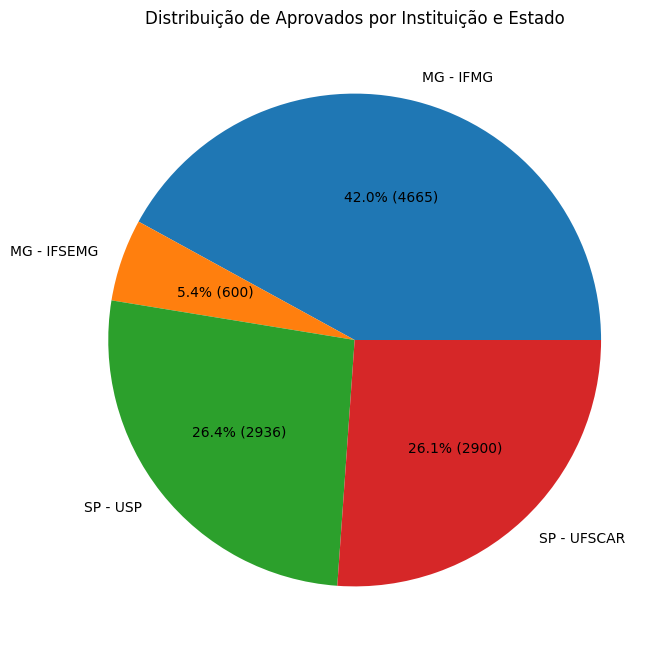

In [57]:
# Criar uma lista de dicionários
data_pie = []

if len(df_top_2_mg) == 2:
    data_pie.append({'Estado': 'MG', 'Instituição': 'IFMG', 'Aprovados': 4665})
    data_pie.append({'Estado': 'MG', 'Instituição': 'IFSEMG', 'Aprovados': 600})
else:
    data_pie.append({'Estado': 'MG', 'Instituição': 'IFMG', 'Aprovados': 4665})

if len(df_top_2_sp) == 2:
    data_pie.append({'Estado': 'SP', 'Instituição': 'USP', 'Aprovados': 2936})
    data_pie.append({'Estado': 'SP', 'Instituição': 'UFSCAR', 'Aprovados': 2900})
else:
    data_pie.append({'Estado': 'SP', 'Instituição': 'USP', 'Aprovados': 2936})

# Converter a lista em um DataFrame
df_pie = pd.DataFrame(data_pie)

# Gerar gráfico de pizza
plt.figure(figsize=(10, 8))
labels = df_pie.apply(lambda row: f"{row['Estado']} - {row['Instituição']}", axis=1)
plt.pie(df_pie['Aprovados'], labels=labels, autopct=lambda p : f"{p:.1f}% ({int(p * sum(df_pie['Aprovados']) / 100)})")
plt.title('Distribuição de Aprovados por Instituição e Estado')
plt.savefig('pie_chart.png', bbox_inches='tight')
plt.show()